  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -6.462687313556671
        x: [ 1.456e-01 -2.146e+00]
      nit: 9
      jac: [-1.982e-03  6.258e-03]
     nfev: 34
     njev: 34
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
[array([ 0.0867914 , -2.32808135]), array([ 0.04591645, -2.2637489 ]), array([ 0.09628539, -2.15984132]), array([ 0.12204937, -2.12729686]), array([ 0.13512461, -2.14070513]), array([ 0.14645914, -2.14732661]), array([ 0.14555982, -2.14608015]), array([ 0.14555997, -2.14608081]), array([ 0.14555997, -2.14608081])]
[-5.935676388442516, -6.137360006570816, -6.398694664239883, -6.439601272344589, -6.4583985805511475, -6.462482064962387, -6.462687104940414, -6.462687313556671, -6.462687313556671]


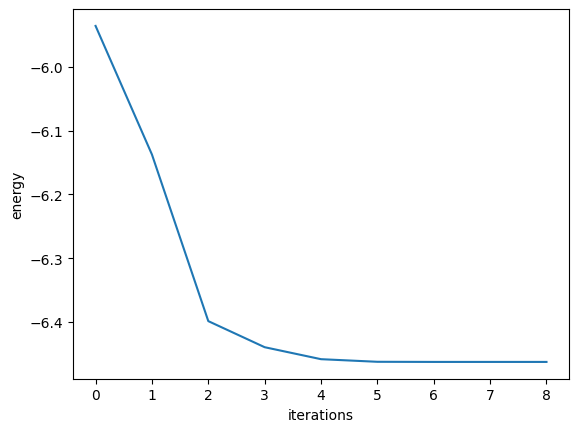

In [8]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from expectation import get_expectation_afm_heisenberg, AFMHeisenbergArgs
from functools import partial

p = 1
length = 4

qsim_option = {'t': int(length / 2), 'f': 1}

initial_gamma = np.array([0.6 for i in range(p)])
initial_beta = np.array([0.6 for i in range(p)])
init_param = np.concatenate([initial_gamma, initial_beta])

function_args = AFMHeisenbergArgs(length, qsim_option)
function = partial(get_expectation_afm_heisenberg, function_args=function_args)

def energy_dummy(params):
    gamma, beta = np.split(params, 2)
    energy = function(gamma=gamma, beta=beta)
    return energy

# Define the gradient function
def numerical_gradient(func, params, epsilon=1e-2):
    grad = np.zeros_like(params)
    for i in range(len(params)):
        params_eps = np.array(params)
        params_eps[i] += epsilon
        grad[i] = (func(params_eps) - func(params)) / epsilon
    return grad

history_params = []
history_energy = []

def callback(params):
    history_params.append(params)
    history_energy.append(energy_dummy(params))

# Use numerical_gradient in minimize
result = minimize(energy_dummy, init_param, method="L-BFGS-B", jac=lambda params: numerical_gradient(energy_dummy, params), callback=callback)

print(result)
print(history_params)
print(history_energy)

plt.plot(history_energy)
plt.xlabel("iterations")
plt.ylabel("energy")
plt.show()


In [10]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from expectation import get_expectation_afm_heisenberg, AFMHeisenbergArgs
import multiprocessing as mp
from functools import partial

In [11]:
p = 1
length = 4

qsim_option = {'t': int(length / 2), 'f': 1}

initial_gamma = np.array([0.6 for i in range(p)])
initial_beta = np.array([0.6 for i in range(p)])
init_param = np.concatenate([initial_gamma, initial_beta])

function_args = AFMHeisenbergArgs(length, qsim_option)
function = partial(get_expectation_afm_heisenberg, function_args=function_args)

In [12]:
def energy_dummy(params):
    gamma, beta = np.split(params, 2)
    energy = function(gamma=gamma, beta=beta)
    return energy

In [13]:
history_params = []
history_energy = []

def callback(params):
    history_params.append(params)
    history_energy.append(energy_dummy(params))

In [14]:
#init_param = np.random.rand(2)
#print(energy_dummy(init_param))

result = minimize(energy_dummy, init_param, method="L-BFGS-B", callback=callback)
# Nelder-Mead
print(result)
print(history_params)
print(history_energy)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.967335868626833
        x: [ 6.000e-01  6.000e-01]
      nit: 0
      jac: [ 0.000e+00  0.000e+00]
     nfev: 3
     njev: 1
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
[]
[]


Text(0, 0.5, 'energy')

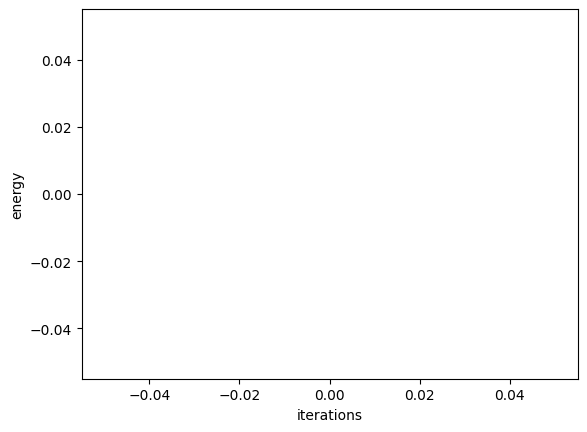

In [15]:
plt.plot(history_energy)
plt.xlabel("iterations")
plt.ylabel("energy")

In [16]:
x,y = list(zip(*history_params))
plt.scatter(x, y)
plt.plot(x, y)

ValueError: not enough values to unpack (expected 2, got 0)